## 岭回归 Ridge Regression

## 模型正则化
- 作用:限制参数大小,平滑决策边界
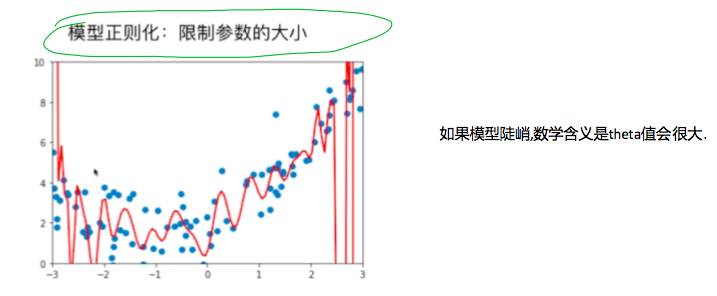

### 在多项式中的岭回归
- 目标:让损失函数足够小,对损失函数加上theta项目,让theta足够小,就可以让损失函数足够小
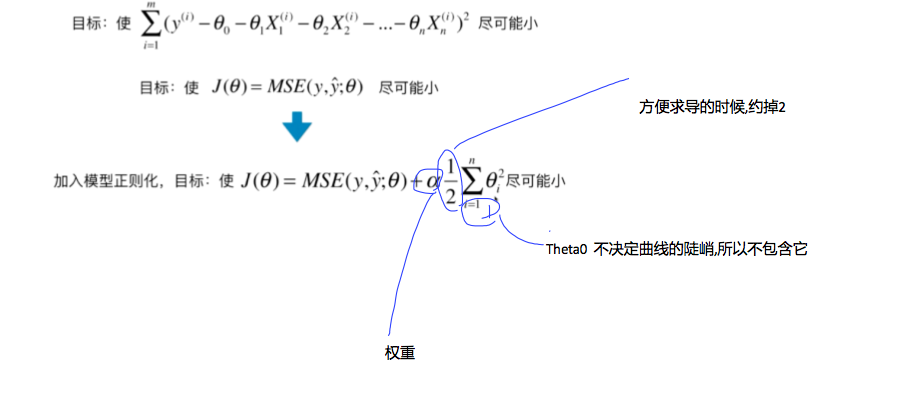

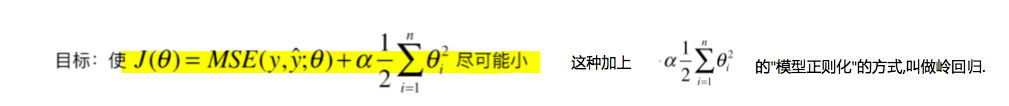

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x + 3 + np.random.normal(0, 1, size=100)

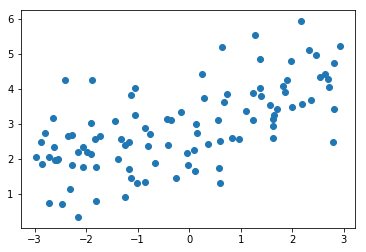

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
from sklearn.metrics import mean_squared_error

poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

y_poly_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

167.94010867293571

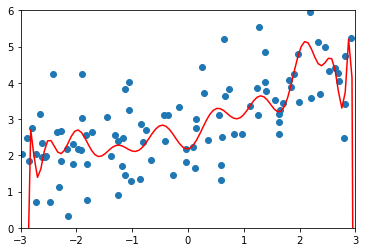

In [7]:
X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
y_plot = poly_reg.predict(X_plot)

plt.scatter(x, y)
plt.plot(X_plot[:,0], y_plot, color='r')
plt.axis([-3, 3, 0, 6])
plt.show()

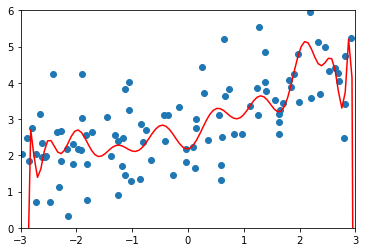

In [8]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

plot_model(poly_reg)

### 使用岭回归

In [15]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree,alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("Ridge_reg", Ridge(alpha=alpha))
    ])

In [16]:
ridge1_reg = RidgeRegression(20,0.00001)

In [19]:
ridge1_reg.fit(X_train,y_train)
y_poly_predict = ridge1_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

1.3874378031433239

相对于线性回归,的确mse少了不少

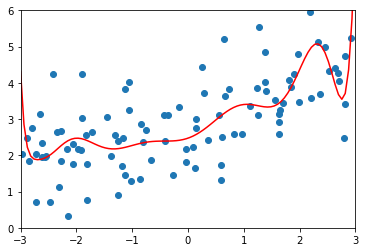

In [21]:
plot_model(ridge1_reg)

In [30]:
ridge2_reg = RidgeRegression(20,1)

In [31]:
ridge2_reg.fit(X_train,y_train)
y_poly_predict = ridge2_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

1.1888759304218448

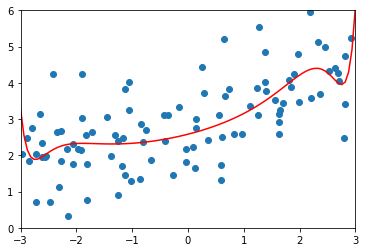

In [32]:
plot_model(ridge2_reg)

In [33]:
ridge3_reg = RidgeRegression(20,100000)

In [34]:
ridge3_reg.fit(X_train,y_train)
y_poly_predict = ridge3_reg.predict(X_test)
mean_squared_error(y_test, y_poly_predict)

1.8360988778885547

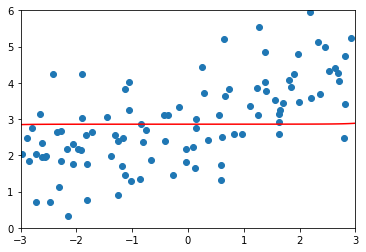

In [35]:
plot_model(ridge3_reg)

当alpha的值很大时,在"正则化"中,只考虑theta的取值,为了让J足够小,当theta取0时,达到最小值,所以为水平线.